<a href="https://colab.research.google.com/github/oskargirardin/CRP_GDPR_datasets/blob/master/Similarity_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DOWNLOADING THE DATASET (Kaggle Json required)

requires adding the kaggle jason (we used it also for the Big Data Algorithm asignments) to the directory in order to download the dataset

In [1]:
! pip install kaggle

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d ahsan81/hotel-reservations-classification-dataset

!unzip hotel-reservations-classification-dataset.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.8/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.8/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open hotel-reservations-classification-dataset.zip, hotel-reservations-classification-dataset.zip.zip or hotel-reservations-classification-dataset.zip.ZIP.


In [ ]:
#imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt


##IMPORTING AND GENERATING TWO DATASETS

In [ ]:
df = pd.read_csv('/content/Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
#Dropping the ID column, has no relevance
df= df.drop(['Booking_ID'], axis = 1)

In [ ]:
#randomly selecting the indexes to randomly split the dataframe into two
list_df1, list_df2= [],[]

for i in range(len(df)):
  n = random.random()
  if n>0.5:
    list_df1.append(i)
  else:
    list_df2.append(i)

print(len(df))
print(len(list_df1))
print(len(list_df2))

36275
18263
18012


In [ ]:
#splitting the dataframe into two parts 
df1 = df.iloc[list_df1].reset_index()
df2 = df.iloc[list_df2].reset_index()

##DATASET ANALYSIS

In [ ]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

We want to understand the similarity between df1 and df2 (df randomly split into two parts).

The dataset is made up by variables of the following type: numerical, binary (0 or 1) and categorical. To assess the similarity between the two datasets the following tasks need to be tackled (POTENTIALLY ADD MORE): 


*   Numerical variables having similar distribution 
*   Categorical variables having similar distribution (every category have similar relative frequency)
*   Binary have simlar distribution
*   There is similar correlation among numerical 
*   There is similar correlation among categorical
*   There is similar correlation among binary 
*   There is similar correlation between numercial and categorical 



In [ ]:
cat_var = ['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']
binary_var = ['required_car_parking_space','repeated_guest']
num_var = []

for var in list(df):
  if var not in cat_var+binary_var:
    num_var.append(var)
  
print(len(list(df)))
print(len(cat_var))
print(len(num_var))
print(len(binary_var))

18
4
12
2


###DISTRIBUTION OF CATEGORICAL

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


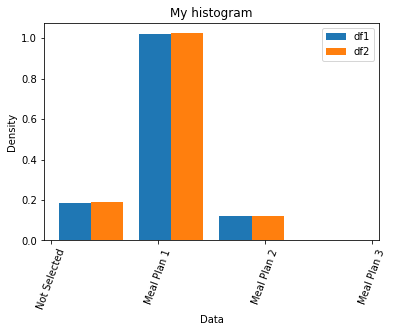

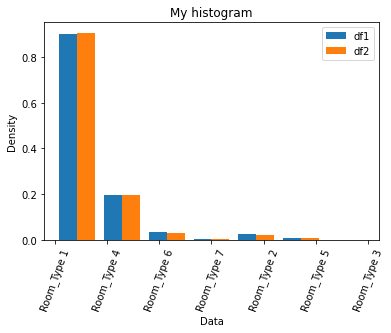

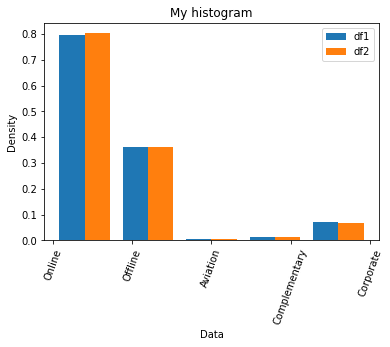

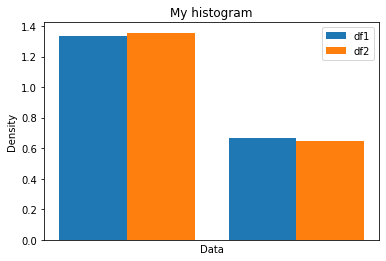

In [ ]:
for cat in cat_var:
  n_bin = len(df[cat].unique())
  plt.hist([df1[cat],df2[cat]],bins =n_bin, density = True, label = ['df1','df2'])
  plt.ylabel('Density')
  plt.xlabel('Data')
  plt.xticks(rotation=70)
  plt.title('My histogram')
  plt.legend(loc='upper right')
  plt.show()

In [ ]:
for cat in cat_var:
  df1_fr = df1[cat].value_counts()/len(df1)
  df2_fr = df2[cat].value_counts()/len(df2)

  df1_fr = df1_fr.to_frame().rename({cat:'df1'},axis = 1)
  df2_fr = df2_fr.to_frame().rename({cat:'df2'},axis = 1)

  freq = pd.concat([df1_fr, df2_fr], axis=1)
  freq['delta'] = abs(freq['df1'] - freq['df2'])
  print('Variable:', cat)
  print(freq,'\n')

Variable: type_of_meal_plan
                   df1       df2     delta
Meal Plan 1   0.766961  0.767710  0.000750
Not Selected  0.140503  0.142350  0.001847
Meal Plan 2   0.092318  0.089885  0.002433
Meal Plan 3   0.000219  0.000056  0.000164 

Variable: room_type_reserved
                  df1       df2     delta
Room_Type 1  0.773367  0.777593  0.004226
Room_Type 4  0.167059  0.166889  0.000170
Room_Type 6  0.027433  0.025816  0.001616
Room_Type 2  0.019767  0.018377  0.001390
Room_Type 5  0.007392  0.007217  0.000175
Room_Type 7  0.004709  0.003997  0.000712
Room_Type 3  0.000274  0.000111  0.000163 

Variable: market_segment_type
                    df1       df2     delta
Online         0.637683  0.642239  0.004556
Offline        0.290588  0.289862  0.000725
Corporate      0.057274  0.053909  0.003366
Complementary  0.010732  0.010826  0.000094
Aviation       0.003723  0.003165  0.000559 

Variable: booking_status
                   df1       df2     delta
Not_Canceled  0.666867  

When it comes to the distribution of the categorical variables there is not much that can be done analysis wise. One can look at the difference in relative frequencies and determine if these distributions are similar enough. 

Set a threshold? ex. need the delta to be < 0.001%

###CORRELATION BETWEEN CATEGORICAL

In [ ]:
!pip install dython  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


THEIL'S U --> ASYMMETRIC (corr(x,y) not corr(y,x)). 

\[0,1\] --> 0 no correlation, 1 perfect correlation


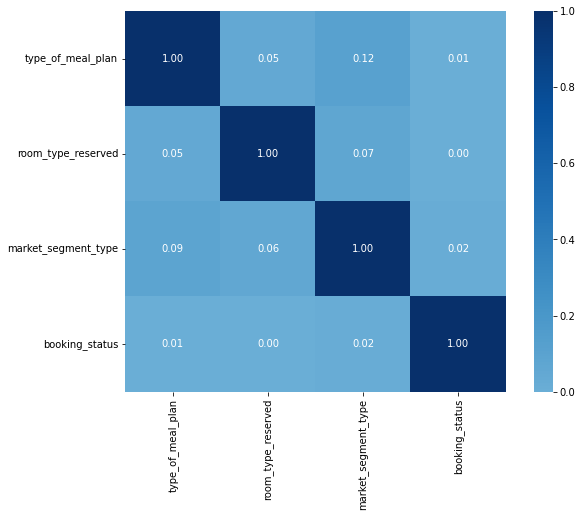

In [ ]:
from dython.nominal import associations

fig, ax = plt.subplots(figsize = (10, 7))
# Estimate and generate Theil's U association plot
theils_u1 = associations(df1[cat_var],
             nom_nom_assoc = 'theil',
             ax = ax,
             cmap = "Blues")

corr1 = theils_u1["corr"].round(4)

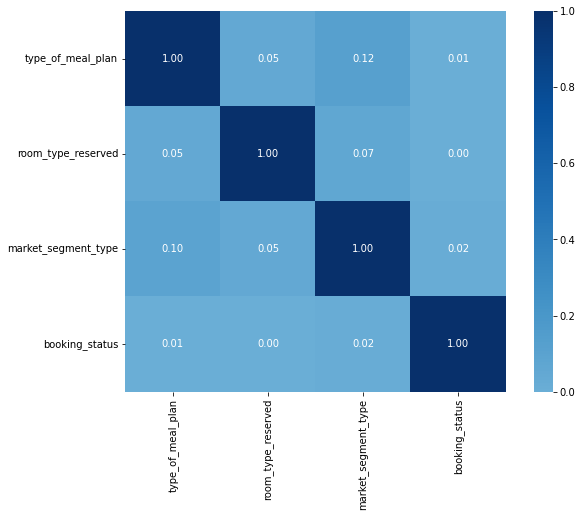

In [ ]:
fig, ax = plt.subplots(figsize = (10, 7))
# Estimate and generate Theil's U association plot
theils_u2 = associations(df2[cat_var],
             nom_nom_assoc = 'theil',
             ax = ax,
             cmap = "Blues")

corr2 = theils_u2["corr"].round(4)

In [ ]:
corr1


,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
type_of_meal_plan,1.0000,0.0535,0.1166,0.0052
room_type_reserved,0.0508,1.0000,0.0712,0.0010
market_segment_type,0.0930,0.0597,1.0000,0.0165
booking_status,0.0057,0.0012,0.0228,1.0000


In [ ]:
corr2

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
type_of_meal_plan,1.0000,0.0542,0.1213,0.0055
room_type_reserved,0.0524,1.0000,0.0656,0.0013
market_segment_type,0.0975,0.0545,1.0000,0.0159
booking_status,0.0061,0.0015,0.0220,1.0000


###DISTRIBUTION OF BINARY

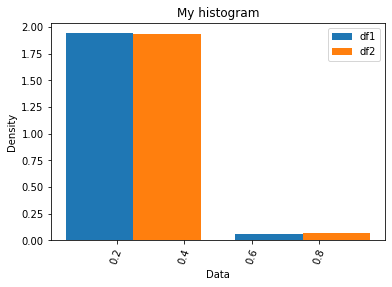

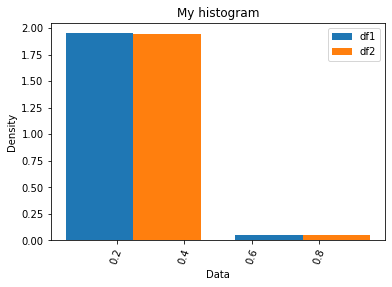

In [ ]:
for bin in binary_var:
  plt.hist([df1[bin],df2[bin]], bins = 2, density = True, label = ['df1','df2'])
  #plt.hist(df1[cat],alpha = 0.5,density=True, label ='df1')
  plt.ylabel('Density')
  plt.xlabel('Data')
  plt.xticks(rotation=70)
  plt.title('My histogram')
  plt.legend(loc='upper right')
  plt.show()

In [ ]:
for bin in binary_var:
  df1_fr = df1[bin].value_counts()/len(df1)
  df2_fr = df2[bin].value_counts()/len(df2)

  df1_fr = df1_fr.to_frame().rename({bin:'df1'},axis = 1)
  df2_fr = df2_fr.to_frame().rename({bin:'df2'},axis = 1)

  freq = pd.concat([df1_fr, df2_fr], axis=1)
  freq['delta'] = abs(freq['df1'] - freq['df2'])
  print('Variable:', bin)
  print(freq,'\n')

Variable: required_car_parking_space
        df1       df2     delta
0  0.970712  0.967319  0.003393
1  0.029288  0.032681  0.003393 

Variable: repeated_guest
        df1       df2     delta
0  0.975069  0.973657  0.001412
1  0.024931  0.026343  0.001412 



Same reasoning that was made on the categorical variables applies also here.